# E-tivity 1

Name: Dara Corr <br>
ID: 22275193

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import math
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Task 1
### Purpose: Describe (in a markdown cell) how a perceptron can be used to classify two objects given their circumference and weight. 

## Answer

Our goal here is to use a perceptron with a machine learning approach to approximate an unknown target function which maps inputs to outputs, in our case this target function takes an object and classifies it by its weight and circumference. The unknown target function is the function which created the data points which are in our data set (training set). <br>

A perceptron is a linear classifier used in Machine Learning to classify objects in a dataset, where the classes are linearly separable. This means we can draw a striaght line boundary between data points to separate them into the different classes. Data points on one side of the line will be classified as one class and data points on the other side of this line boundary will be classified as another class. For example, maybe this system can be used to classify crayons and pencils, given data of the weight and diameter of different stationary used for writing. <br>

This data set consists of the objects' circumference and weight as the input space and the objects' class as the output space. This means that the machine learning model takes circumference and weight as the inputs and uses the classification algorithm to return the classes of the objects as the output. <br>

The machine learning model will create many different models (or Hypotheses) with different parameters or weights when trying to approximate the unknown target function. The Hypothesis Set is made up of all the different hypotheses the model can generate based on changing the different input parameters. The total number of possible models, we can call some integer M, which is too large to work with. We start to look at dichotomies, There can be a maximum of $2^{N}$ different dichotomies (where $N$ is the number of data points). Dichotomies are mutually exclusive subsets of the dataset that tell us the different ways the data can be classified. There can be multiple models that classify the data in the same way (i.e. have the same dichotomy) and so we only look at the dichotomies instead to reduce the size of the right hand side of the Hoeffding bound from $2 \cdot M e^{-2 \epsilon^{2}}$ to $2 \cdot 2^{N} e^{-2 \epsilon^{2}}$. So instead of looking at M possible models (which can be a potentially infinite number), we have reduced it to a maximum of $2^{N}$ dichotomies. <br>

The final hypothesis is chosen from the hypothesis set based on how well it will perform when it is run on new unseen data and how well it performs on the training data. We found from the Hoeffding Bound and the VC bound, that the number of feasible candidates for the final hypothesis decreases as the number of data points N increases. This is because after a breakpoint with VC dimension $d_{VC}$ for a number of datapoints N, the model will no-longer shatter the dataset for any N+1 datapoints and this in turn means the number of hypotheses in the hypothesis set decreases as N increases. This means that with enough data points, learning from data is possible, as we can narrow down the many different models with different sets of parameters in the hypothesis set to one model which fits the unseen data very well. 

We want to pick a final hypothesis with weights such that it minimises the out-of-sample error to ensure that it will perform well on new unseen data. We also need to ensure that the in-sample error is not too large, so ultimately we want to minimize $|E_{in} - E_{out}|$. The number of data points $N$ is chosen so as to minimize $|E_{in} - E_{out}|$.

For linear classification the Error function used is Mean Squared Error for Training Error and Classification Error for Testing Error (Performance). The upper bound for number of data points needed for learning from data is the upper bound is $N \approx d_{VC} \cdot 10000$, however as a rule of thumb, we take $N$ to be $N \approx d_{VC} \cdot 10$ to be a sufficient number of data points needed for learning from data to be possible.

# Task 2
Learning curves allow us to look at the impact that the size of the training data set N has on the ability to keep the difference between $E_{in}$ and $E_{out}$ small.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_errors = 1- train_scores
    test_errors = 1-test_scores
    
    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")

    
    plt.legend(loc="best")
    return plt

In [3]:
data = np.loadtxt("Et1_Task2.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

## Logistic regression learning curve

In [4]:
cv = ShuffleSplit(n_splits=25, test_size=0.2)

<module 'matplotlib.pyplot' from 'C:\\Users\\Dara\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

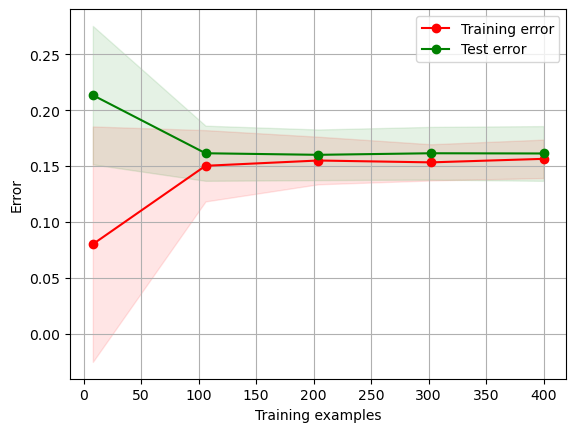

In [7]:
estimator = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

## Neural net learning curves

<module 'matplotlib.pyplot' from 'C:\\Users\\Dara\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

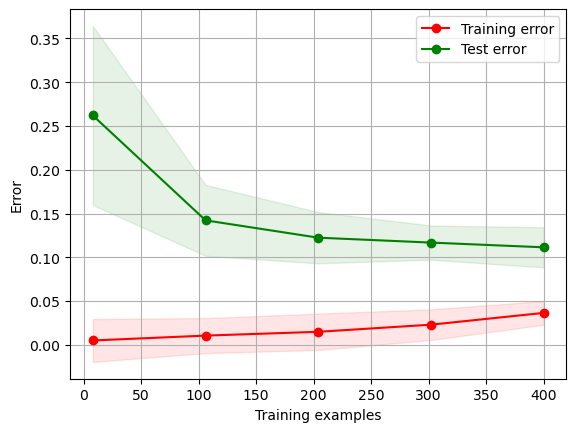

In [9]:
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 4), random_state=1)
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

# Reflection
Describe the results of the two learning curves and explain the differences in terms of what you currently understand about the relationship between $E_{in}$ and $E_{out}$ and the number of training samples, N. Provide clear explanations:

- Why the training error is (generally) lower than the test error
- Why the training error increases as the number of training samples is increased
- Which of the two models is the more complex model

### Answer


- The training error is less than the testing error is because the model is fitted to the training data and when new data points are introduced from the testing data, the model underfits the data and hence the testing error is larger than the training error. 


- Another reason the training error is normally lower than the test error because of the relation: $$ E_{out}(g) \leq E_{in}(g) + \Omega (N,H,\delta) $$ Where $\Omega$ is the generalisation error which is a function of number of data points $N$, model complexity $H$ and parameter $\delta$. This means that the generalisation error is generally quite large which is the reason why the training error is generally lower than the test error. If the test error is less than the training error this may be because the generalisation error is quite low. Generalisation error can be minimized by avoiding overfitting.


- The training error increases as the number of training samples are increased because, as more data points are introduced in the training set it becomes more difficult to create a model that fits all the data points and the error in the training set increases. However we notice that the error decreases in the testing set as more data points are added and this is because the model is learning as more data points are added and this produces a better fit with the model in the testing data as a result. 


- From the plots we can see that the Neural Network classification is a more complex model for classification than the Logistic Regression classification. This is because the $|E_{in} - E_{out}|$ values are far greater in the Neural Network model despite having very low training errors. To me, this suggests that the Neural Network model tends to over-fit to the training data. In contrast the $|E_{in} - E_{out}|$ value is much smaller for the logistic regression model, especially for values of $N > 100$. Because of this, I would consider the logistic regression model superior for classification of this dataset.

# Task 3

## Provided functions

Below functions implement linear regression in a closed form (one-step solution using the pseudo-inverse).

In [7]:
def linreg_weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],1)),axis=1) #change made here -> X.shape[1] = 1
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [8]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],1)),axis=1) #changed X.shape[1] to 1 since X is column vector now
    
    # Calculation of outputs given weights and data (X). 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

# Task 3a

### Answer

In [17]:
def calc_error(w,X,y,Y_hat):
    MSE = ( ((y - Y_hat).T).dot(y - Y_hat) )/ (n_samples) #MSE = ((y-y_hat)^2 )/n
    return MSE

In [18]:
data = np.loadtxt("Et1_Task3a.csv", delimiter=",")
X = data[:,0]
y = data[:,1]

In [19]:
n_samples = len(X)

In [20]:
w = linreg_weights(X,y)
Y_hat = linreg_predict(w,X)
MSE = calc_error(w,X,y,Y_hat)

print("Mean Squared Error from this regression model = {0:.5f}".format(MSE))

Mean Squared Error from this regression model = 0.00428


In [21]:
#Other way of calculating errors
errors = (abs(Y_hat - y))

SquareErrors = np.zeros(n_samples)

for i in range(len(errors)):
    SquareErrors[i] = (errors[i])**2
    
SSE = sum(SquareErrors)
MSE = SSE/(n_samples) #MSE = SSE/N
print("Mean Squared Error from this regression model = {0:.5f}".format(MSE))

Mean Squared Error from this regression model = 0.00428


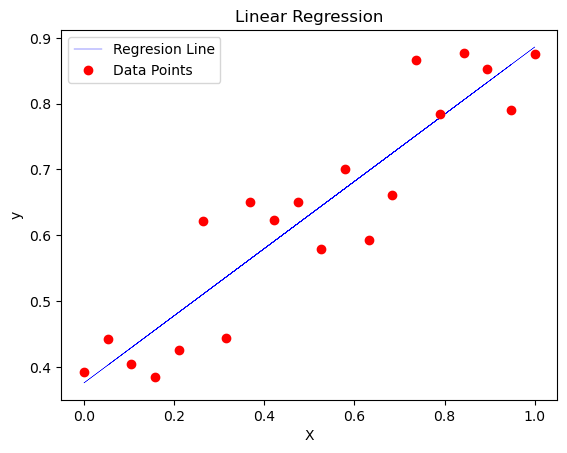

In [22]:
plt.plot(X,Y_hat, 'b-',  linewidth=0.3, label = "Regresion Line")
plt.plot(X,y,'ro', label = "Data Points")
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.show()

In [27]:
errors = np.zeros(n_samples)

for i in range(len(errors)):
    errors[i] = (y[i] - Y_hat[i])*(y[i] - Y_hat[i])

Max = 0
for i in range(0,len(errors)):
    if errors[i] > Max:
        Max = errors[i]
        index = i

print("point with maximum error is ({0:.3f},{1:.3f})".format(X[index],y[index]))

point with maximum error is (0.737,0.866)


In [29]:
X1 = np.append([X], [0.1])
y1 = np.append([y], [1.6])
n_samples = len(X1)
n_features = 1

w = linreg_weights(X1,y1)
Y_hat1 = linreg_predict(w,X1)
MSE1 = calc_error(w,X1,y1,Y_hat1)

print(MSE1) #MSE increased when i added outlier (0.1,1.6), 

0.06173576214933223


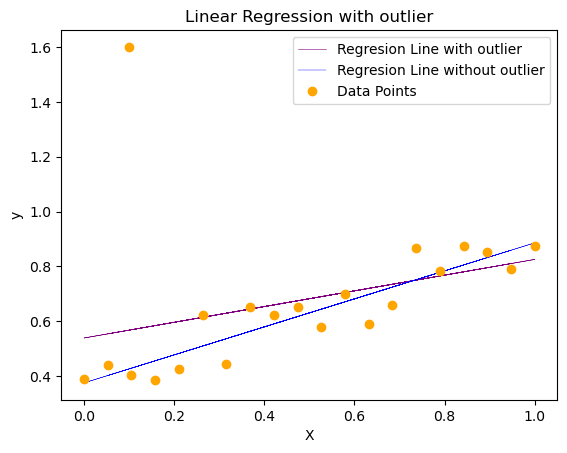

In [30]:
plt.plot(X1,Y_hat1, '-',  linewidth=0.4, label = "Regresion Line with outlier", color = 'purple')
plt.plot(X,Y_hat, 'b-',  linewidth=0.3, label = "Regresion Line without outlier")
plt.plot(X1,y1,'o', label = "Data Points", color = 'orange')
plt.title("Linear Regression with outlier")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.show()

## Reflection
Discuss your results and answer the following questions:
1. Which data point adds the biggest error term to the optimised error function?
2. How does the error contributed by this point relate to its distance from the regression line/function? 
3. How do outliers effect linear regression and why?
4. Under what circumstances will linear regression with a squared error measure be a good model?

1. The point (0.737,0.866) adds the biggest error term to the optimised error function
2. The error contributed to this point is the square of the distance from the point to the regression line, since the error measure we are using is the Mean Squared Error.
3. Outliers can have a large impact on linear regression because the error is the square of the distance from the regression line, this means that large outliers can pull the regression line away from the line that best fits the rest of the training data because the squared distance has a large effect on the regression line. This can be solved by applying smaller weights to data points which are considered influential outliers.
4. Linear Regression with a squared error measure is a good model for systems that behave linearly and do not have very big influential outliers. It is suited to forecasts and predictions of continuous variables but it is not suited for binary classification problems. One main issue with using MSE for binary classification is that if there is a large influential outlier in the data, then the regression line will end up mis-classifying lots of points in the out of sample data by trying to correct to the large error of the outlier.

# Task 3b

For regression the Mean Squared Error measure is a useful error measure. In this task we will explore how useful mean squared error is for classification. To this end:

- Use the provided code to classify the provided data using the linear classification algorithm
- Note that linear classification is implemented by putting the output of the linear regression model through the sign function

### Answer

In [ ]:
def calc_class_error(w,X,y):
    # implement your error function for linear classification here

In [30]:
def linclass_predict(w,X):
    # implement your linear classification algorithm here

You may add as many cells below as you require.

# Reflection
Describe the impact of the outlier on both models. Explain why logistic regression is less sensitive to the outlier. 

Provide your answer in this cell..

## Demonstration of effect of outlier on logistic regression decision boundary for comparision with linear classification

Below code demonstrates the effect of an outlier on the decision boundary chosen by logistic regression. You can use this code to compare the effect of outliers in a classification algorithm using mean square error as the error measure with that in a classification algorithm using log likelihood as the error measure. Moreover, below code provides some good hints for plotting the decision boundary in task 3b :-).

Load data:

In [13]:
data = np.loadtxt("Et1_Task3b.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

Fit model:

In [14]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.83

Extract weights from model:

In [15]:
w_lr = estimator.intercept_
w_lr=np.append(w_lr, estimator.coef_)
w_lr

array([ 0.0734753 ,  1.13198888, -1.608425  ])

Add outlier:

In [17]:
X = np.append(X,[[-2,6]], axis=0)
y = np.append(y,[1],axis=0)

Fit model with outlier:

In [18]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.7941176470588235

Extract new weight vector from model:

In [19]:
w_lr_2 = estimator.intercept_
w_lr_2=np.append(w_lr_2, estimator.coef_)
w_lr_2

array([ 0.11837795,  0.87369122, -0.65007428])

Plot original and new decision boundary using weight vectors. Decision boundary is defined by equation: $w_0+x_0\cdot w_1+x_1 \cdot w_2=0 \rightarrow x_2 = -\frac{w_0}{w_2}-x_1\frac{w_1}{w_2}$

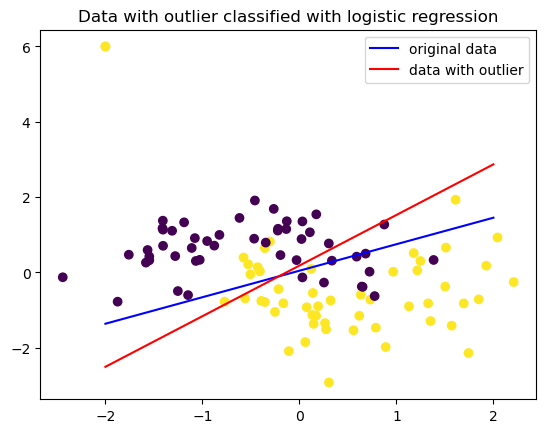

0.5882352941176471

In [20]:
y_p = estimator.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-2,2],[-w_lr[0]/w_lr[2]+w_lr[1]/w_lr[2]*2,-w_lr[0]/w_lr[2]-w_lr[1]/w_lr[2]*2],'b',label="original data")
plt.plot([-2,2],[-w_lr_2[0]/w_lr_2[2]+w_lr_2[1]/w_lr_2[2]*2,-w_lr_2[0]/w_lr_2[2]-w_lr_2[1]/w_lr_2[2]*2],'r',label='data with outlier')

plt.title("Data with outlier classified with logistic regression")
plt.legend(loc="upper right")
plt.show()
1-sum(abs(y_p-y))/len(y)